### Task 2.4
### Project: NYC Citi Bike Dashboard Analysis
#### Abstract
This notebook transitions from the foundational plotting of Matplotlib to the high-level, aesthetically pleasing capabilities of **Seaborn**. The primary objective is to generate key visualizations for the final project dashboard, focusing on both categorical and statistical data analysis. The exercise demonstrates how to leverage Seaborn's powerful theming engine, its specialized statistical plots, and its seamless integration with Matplotlib's object-oriented paradigm to create insightful and polished charts.
#### **Methodology and Key Visualizations:**
- **Global Theming:** A consistent and professional theme (darkgrid style and viridis palette) is established for all plots using sns.set_theme(), ensuring a cohesive look and feel throughout the notebook.
- **Ranked Bar Chart (Top Stations):** A horizontal bar chart of the top 20 start stations is created. This section addresses a key visualization challenge by using a temporary, high-contrast color palette (viridis_r) to create a strong visual hierarchy that the global theme could not provide for 20 distinct categories.
- **Dual-Axis Line Chart (Seasonality):** The seasonality plot from the previous exercise is recreated, demonstrating the powerful hybrid approach of using Matplotlib's Object-Oriented structure for precise control over the dual axes, while inheriting Seaborn's superior aesthetics from the global theme.
- **Statistical Box Plot (User Behavior):** A box plot is used to analyze and compare the trip duration distributions between member and casual users. The analysis clearly reveals that casual riders take longer and more varied trips, supporting the hypothesis that they use the service for leisure rather than commuting.
- **Advanced FacetGrid (Multi-Dimensional Analysis):** A FacetGrid is created to perform a deeper, multi-dimensional analysis, breaking down trip duration histograms by both user type and bike type. The resulting grid provides nuanced insights, confirming that user type is the primary driver of trip duration, while also revealing that classic bikes are significantly more utilized than electric ones.

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm # For the bonus task

# Load the final merged dataset from the previous task
try:
    # THE FIX: Correctly define the data types for ALL station-related columns.
    # The warning was about columns 5 and 7, which are the ID columns.
    column_dtypes = {
        'start_station_name': str,
        'start_station_id': str, # Explicitly set the ID column to string
        'end_station_name': str,
        'end_station_id': str    # Explicitly set the ID column to string
    }

    # Load the CSV, passing the corrected dtype information.
    # The DtypeWarning will now be gone.
    df_full = pd.read_csv(
        'citi_bike_2022_with_weather.csv',
        dtype=column_dtypes
    )
    
    print("Successfully loaded 'citi_bike_2022_with_weather.csv'.")
    # Convert date column to datetime objects for proper plotting
    df_full['date'] = pd.to_datetime(df_full['date'])
    
except FileNotFoundError:
    print("Error: 'citi_bike_2022_with_weather.csv' not found. Please ensure it's in the same directory.")
    df_full = pd.DataFrame()

display(df_full.head())

Successfully loaded 'citi_bike_2022_with_weather.csv'.


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,_merge
0,9D0DC440CB40CF8E,electric_bike,2022-08-27 13:56:47.728,2022-08-27 14:02:56.651,Flatbush Ave & Ocean Ave,3704.04,3 St & Prospect Park West,3865.05,40.663657,-73.963014,40.668132,-73.973638,casual,2022-08-27,27.8,both
1,2214991DFBE5C4D7,electric_bike,2022-08-20 10:37:02.756,2022-08-20 10:45:56.631,Forsyth St\t& Grand St,5382.07,E 11 St & 1 Ave,5746.14,40.717798,-73.993161,40.729538,-73.984267,casual,2022-08-20,27.9,both
2,20C5D469563B6337,classic_bike,2022-08-31 18:55:03.051,2022-08-31 19:03:37.344,Perry St & Bleecker St,5922.07,Grand St & Greene St,5500.02,40.735354,-74.004831,40.721700,-74.002381,member,2022-08-31,25.6,both
3,3E8791885BC189D1,classic_bike,2022-08-02 08:05:00.250,2022-08-02 08:16:52.063,FDR Drive & E 35 St,6230.04,Grand Army Plaza & Central Park S,6839.10,40.744219,-73.971212,40.764397,-73.973715,member,2022-08-02,26.4,both
4,8DBCBF98885106CB,electric_bike,2022-08-25 15:44:48.386,2022-08-25 15:55:39.691,E 40 St & 5 Ave,6474.11,Ave A & E 14 St,5779.11,40.752052,-73.982115,40.730311,-73.980472,member,2022-08-25,28.1,both


In [2]:
# As per the task, we will pick one theme to apply to all subsequent plots.
# The 'darkgrid' style is professional and easy to read.
# The 'viridis' palette is colorblind-friendly and provides a pleasant gradient.
sns.set_theme(style="darkgrid", palette="viridis")

print("Seaborn theme set to style='darkgrid' and palette='viridis'.")

Seaborn theme set to style='darkgrid' and palette='viridis'.


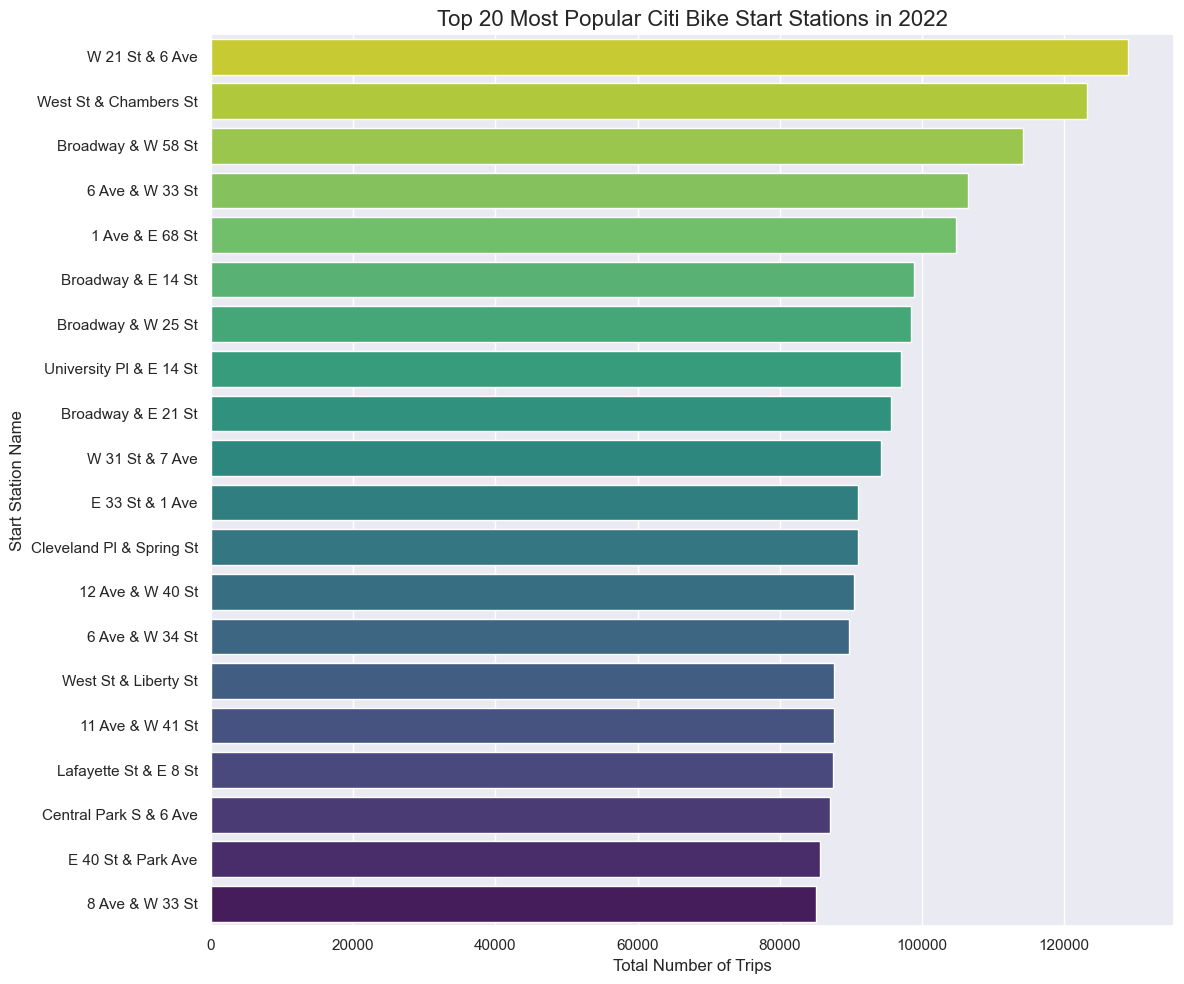

In [3]:
# --- Data Preparation ---
# First, we need to count the frequency of each starting station.
top_20_stations = df_full['start_station_name'].value_counts().nlargest(20).reset_index()
top_20_stations.columns = ['station_name', 'trip_count']

# --- Visualization ---
plt.figure(figsize=(12, 10))

# THE MODERN SEABORN FIX:
# As per the warning's instruction, we assign the categorical variable ('station_name')
# to both 'y' and 'hue'. This tells Seaborn to color each bar differently based on its category.
# We also set legend=False because we don't need a color legend for a bar chart.
sns.barplot(
    data=top_20_stations,
    y='station_name',
    x='trip_count',
    hue='station_name', 
    palette='viridis_r', 
    legend=False      
)

# Add title and labels
plt.title('Top 20 Most Popular Citi Bike Start Stations in 2022', fontsize=16)
plt.xlabel('Total Number of Trips')
plt.ylabel('Start Station Name')
plt.tight_layout()
plt.show()

### Analysis of the Top 20 Start Stations Bar Chart
The task required an evaluation of the globally set theme for this specific bar chart. The initial theme, sns.set_theme(style="darkgrid", palette="viridis"), was **not suitable** for this visualization for two key reasons:
1. **Technical Limitation:** The default viridis palette does not contain 20 distinct colors. As a result, when applied to the 20 bars, Seaborn defaulted to a single color, which failed to visually distinguish between the different stations.
2. **Lack of Visual Hierarchy:** The primary goal of this chart is to show a **ranking** of the most popular stations. A single color (or a random assortment of colors) does not reinforce this ranked order.
To address this, the plot's style was temporarily changed using the modern Seaborn approach. By assigning hue='station_name' and palette='viridis_r', we explicitly instructed Seaborn to apply a unique color from the reversed viridis palette to each of the 20 stations. The final result is a much more effective chart where the gradient from bright (most popular) to dark (less popular) creates a strong visual hierarchy, making the ranking instantly intuitive and more impactful for the viewer.

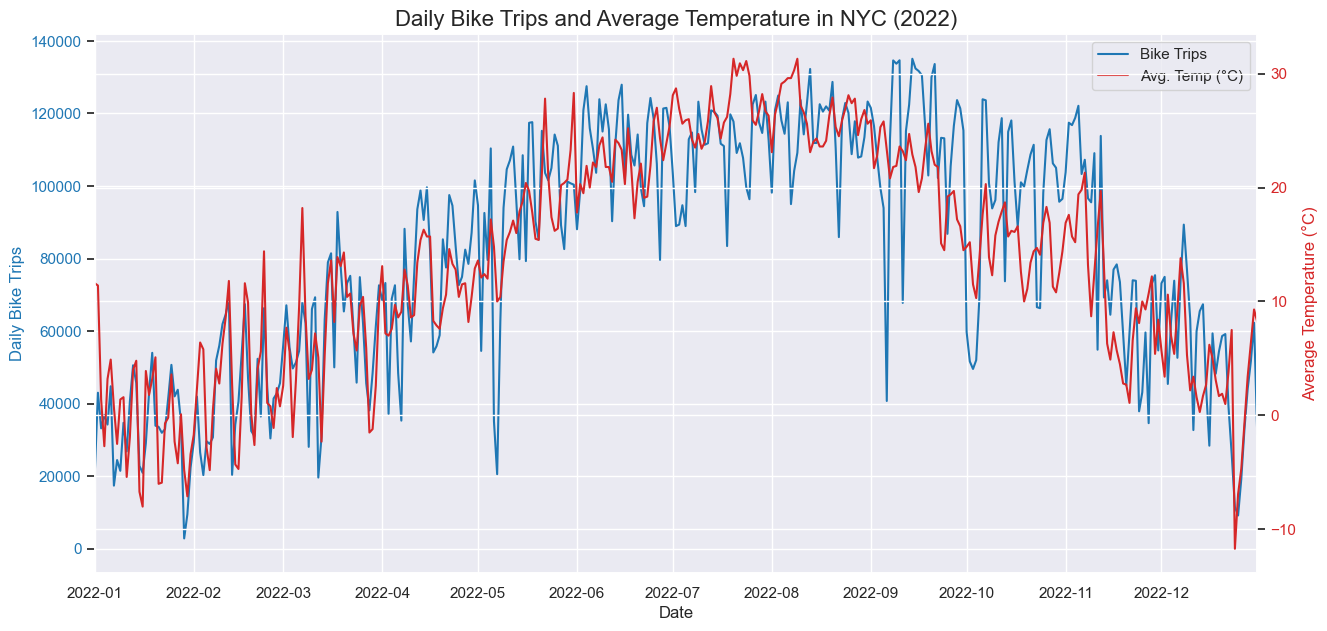

In [4]:
# --- Data Preparation ---
# We'll create the same daily summary DataFrame as in the previous task.
df_daily_weather = df_full[['date', 'avgTemp']].drop_duplicates(subset='date').set_index('date')
df_trip_counts = df_full.groupby('date')['ride_id'].count().to_frame(name='trip_count')
df_daily = df_daily_weather.join(df_trip_counts).sort_index()

# --- Visualization ---
# Note: Matplotlib's ax.plot() is used here instead of sns.lineplot().
# This provides more direct control over the dual-axis setup and avoids
# known scaling/legend issues, while still benefiting from the global Seaborn theme.
# 1. Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(15, 7))
plt.title('Daily Bike Trips and Average Temperature in NYC (2022)', fontsize=16)

# 2. Plot the bike rides on the primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Bike Trips', color=color, fontsize=12)
ax1.plot(df_daily.index, df_daily['trip_count'], color=color, label='Bike Trips')
ax1.tick_params(axis='y', labelcolor=color)

# 3. Create the second axis
ax2 = ax1.twinx()

# 4. Plot the temperatures on the secondary y-axis
color = 'tab:red'
ax2.set_ylabel('Average Temperature (°C)', color=color, fontsize=12)
ax2.plot(df_daily.index, df_daily['avgTemp'], color=color, label='Avg. Temp (°C)')
ax2.tick_params(axis='y', labelcolor=color)

# 5. THE DEFINITIVE FIX: Create explicit Timestamps for the axis limits.
start_date = pd.Timestamp('2022-01-01')
end_date = pd.Timestamp('2022-12-31')
ax1.set_xlim([start_date, end_date])

# 6. Create a combined legend
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, loc='upper right')

plt.show()

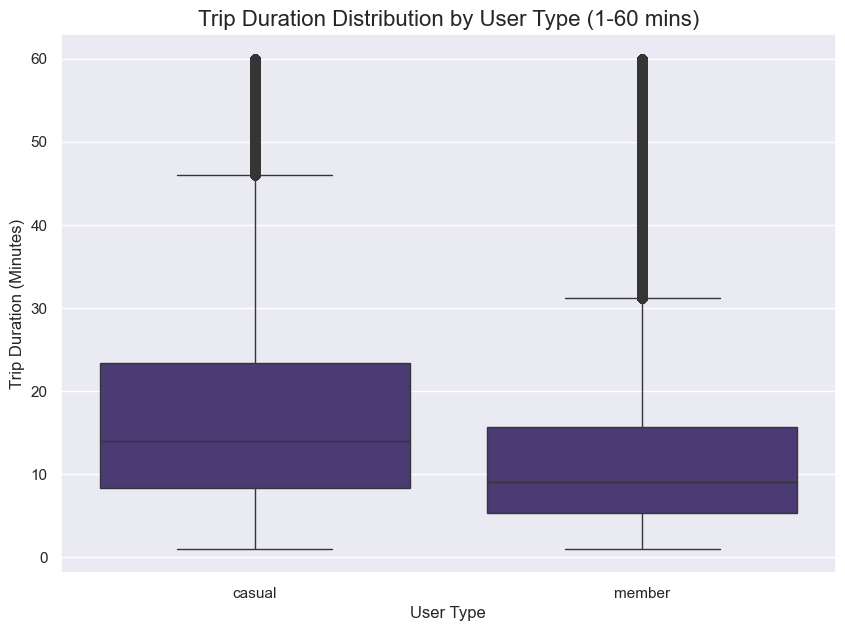

In [5]:
# --- Data Preparation for Duration Calculation ---

# First, we must calculate the trip duration in minutes.
# (This ensures the column exists even if cells are run out of order)
df_full['started_at'] = pd.to_datetime(df_full['started_at'])
df_full['ended_at'] = pd.to_datetime(df_full['ended_at'])
df_full['trip_duration_mins'] = (df_full['ended_at'] - df_full['started_at']).dt.total_seconds() / 60

# For a readable box plot, we should filter out extreme outliers.
# Let's focus on trips between 1 and 60 minutes.
df_filtered_duration = df_full[(df_full['trip_duration_mins'] >= 1) & (df_full['trip_duration_mins'] <= 60)]

# --- Visualization ---
plt.figure(figsize=(10, 7))

# The global theme we set earlier will be applied automatically.
sns.boxplot(
    data=df_filtered_duration,
    x='member_casual',
    y='trip_duration_mins'
).set_title('Trip Duration Distribution by User Type (1-60 mins)', fontsize=16)

plt.xlabel('User Type')
plt.ylabel('Trip Duration (Minutes)')
plt.show()

### Analysis of Trip Duration by User Type

This box plot reveals clear and distinct behavioral differences between **casual** and **member** riders. By analyzing the core elements, we see the **median trip duration** (the line inside the box) is significantly higher for casual riders, at approximately **14 minutes**, compared to just **9 minutes** for members. Furthermore, the **interquartile range** (the box itself) is much taller for casual riders, which shows a far greater variability in their trip lengths compared to the more consistent, shorter trips of members. This strongly **supports the hypothesis** that **members primarily use the service for predictable commutes**, while **casual users engage in more leisurely, varied-length rides for recreation or tourism.**

### FacetGrid Analysis Rationale

A FacetGrid is the perfect tool to answer a deeper business question: **"Does the trip duration behavior of members vs. casual users change depending on the type of bike they use (classic vs. electric)?"** By creating a grid of histograms, we can compare four distinct distributions at once, providing a much richer insight than a single plot could. This can help inform marketing or pricing strategies for different bike types.

---

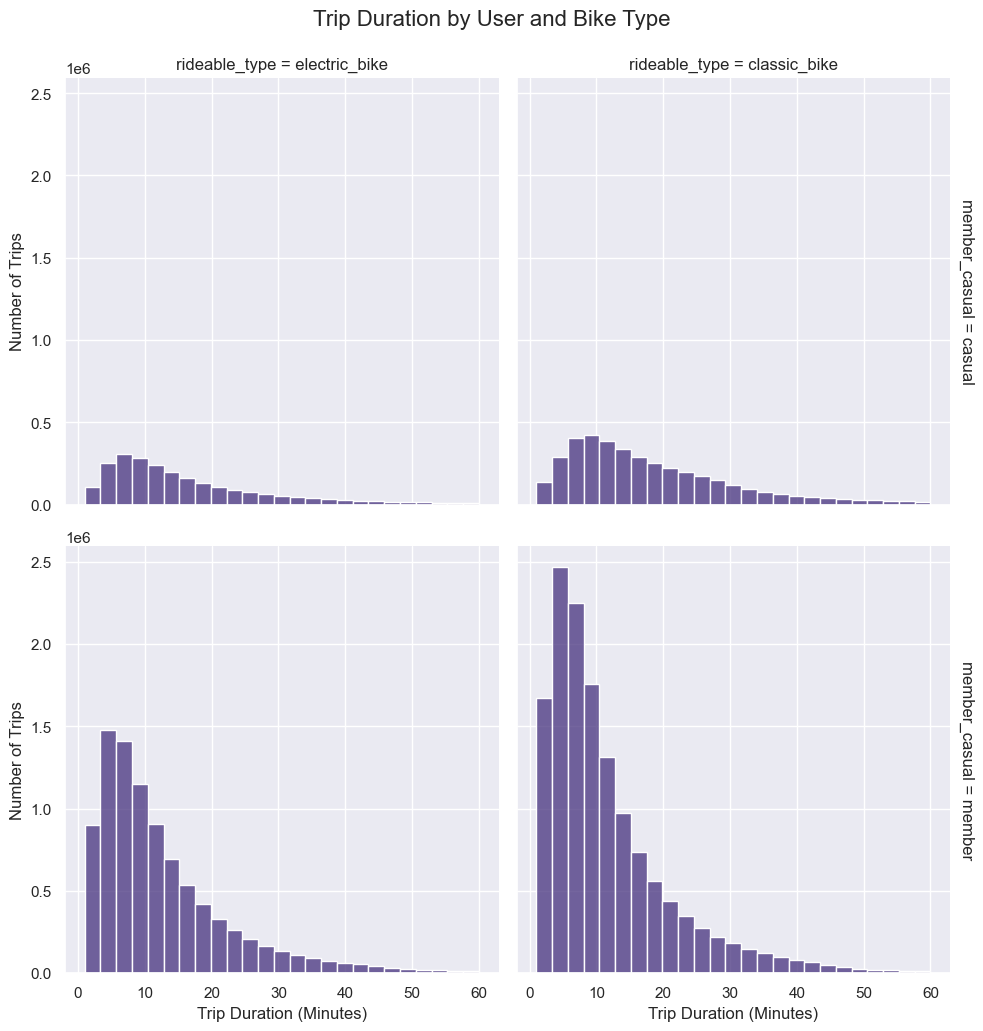

In [6]:
# --- FacetGrid Visualization ---
# A FacetGrid helps us compare distributions across multiple categories.
# Here, we'll see if trip duration changes based on BOTH user type and bike type.

# Create a FacetGrid object, creating columns for 'rideable_type' and rows for 'member_casual'.
g = sns.FacetGrid(
    data=df_filtered_duration,
    row='member_casual',
    col='rideable_type',
    height=5,
    margin_titles=True
)

# Map a histogram of trip durations onto each facet of the grid.
g.map(sns.histplot, 'trip_duration_mins', bins=25)
g.figure.suptitle('Trip Duration by User and Bike Type', y=1.03, fontsize=16)
g.set_axis_labels("Trip Duration (Minutes)", "Number of Trips")

plt.show()

### FacetGrid Insights

This FacetGrid provides a powerful, multi-dimensional view that allows for a nuanced comparison of user behavior. The four distinct histograms reveal two key insights:

1.  **User Type is the Primary Driver of Behavior:** The most striking difference is between the top row (`casual`) and the bottom row (`member`). For both electric and classic bikes, the histograms for members are taller and more concentrated on shorter trip durations (peaking around 5-10 minutes). In contrast, the casual rider distributions are flatter and more spread out, confirming they take longer, more varied trips. This strongly supports the hypothesis that members are primarily commuters while casual users are leisure riders.

2.  **Classic Bikes are More Popular:** When comparing the left column (`electric_bike`) to the right column (`classic_bike`), the y-axis scale shows that the number of trips on classic bikes is significantly higher for both user types. The classic bike histograms reach heights of ~2.5 million trips, whereas the electric bike trips peak well below 0.5 million. This is a critical insight for the business, indicating that the classic bike fleet is the core of the service.